In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.3 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [ ]:
pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached top2vec-1.0.28-py3-none-any.whl (25 kB)
  Using cached hdbscan-0.8.29.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3582144 sha256=85206f89507d9b4a0174b9b186df1752d3e5fdb34b6f6b2d3e42535ae9a37c25
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.

In [ ]:
import pandas as pd
import tensorflow_hub as hub
import numpy as np
from google.colab import drive
from top2vec import Top2Vec
#from transformers import AutoTokenizer, AutoModel
#import transformers
import torch

In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace the file path with the path to your CSV file on your Google Drive
file_path = '/content/drive/MyDrive/Data/train.csv'

# Read the CSV file using pandas
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

reviews = df[df.fournisseur.str.contains("totalenergies")].reset_index()
verbatim = reviews['verbatim'].astype(str).tolist()


#model = Top2Vec(verbatim, embedding_model='universal-sentence-encoder')

In [ ]:
reviews

,index,page,titre,verbatim,date,note,reponse,date_experience,fournisseur,source
0,5000,1,Service impeccable chez Total Energie,A chaque fois que je contacte au téléphone le ...,Il y a 19 heures,5,NaN,Date de l'expérience: 01 décembre 2022,https://fr.trustpilot.com/review/totalenergies.fr,trustpilot
1,5001,1,Offre immanquable,"Installation Rapide, Prix concurrentiel et sur...",ll y a 5 jours,5,NaN,Date de l'expérience: 27 novembre 2022,https://fr.trustpilot.com/review/totalenergies.fr,trustpilot
2,5002,1,Service client déplorable,Cliente chez total énergie depuis près de deux...,Il y a un jour,1,"Bonjour Monsieur, Madame,\n\nJ'ai bien pris en...",Date de l'expérience: 22 novembre 2022,https://fr.trustpilot.com/review/totalenergies.fr,trustpilot
3,5003,1,Nous sommes en litige avec vous des…,Nous sommes en litige avec vous des sommes dem...,ll y a 6 jours,1,"Bonjour Monsieur, Madame,\n\nJ'ai bien pris en...",Date de l'expérience: 26 novembre 2022,https://fr.trustpilot.com/review/totalenergies.fr,trustpilot
4,5004,1,J’ai été démarché par Yamina YAICHE…,J’ai été démarché par Yamina YAICHE alors que ...,24 nov. 2022,1,"Bonjour,\nJ'ai bien pris en compte votre avis ...",Date de l'expérience: 15 septembre 2022,https://fr.trustpilot.com/review/totalenergies.fr,trustpilot
...,...,...,...,...,...,...,...,...,...,...
14355,31299,643,Avis client,Je veux recevoir mai facture et mai consommass...,le 14/09/2022 par PHILIPPE S.,3,NaN,suite à une expérience du 05/06/2021,https://www.avis-verifies.com/avis-clients/tot...,avis_verifies
14356,31300,643,Avis client,Trés dur d avoir des réponse j ai plusieurs co...,le 14/09/2022 par PHILIPPE S.,3,NaN,suite à une expérience du 05/06/2021,https://www.avis-verifies.com/avis-clients/tot...,avis_verifies
14357,31301,643,Avis client,"Bjr,ma facture a été divulgué au voisin ,il en...",le 14/09/2022 par PHILIPPE S.,3,NaN,suite à une expérience du 05/06/2021,https://www.avis-verifies.com/avis-clients/tot...,avis_verifies
14358,31302,643,Avis client,Donne de bonnes réponse et explications et inf...,le 14/09/2022 par François Eugène N.,5,NaN,suite à une expérience du 05/09/2022,https://www.avis-verifies.com/avis-clients/tot...,avis_verifies


Pre-processing using the bert transformer (We do not use this for are final top2vec model)

In [ ]:
# Load the transformer model
model_name = 'bert-base-uncased'
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
model = transformers.AutoModel.from_pretrained(model_name)

# Preprocess the text data
preprocessed_data = []
for text in verbatim:
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens if t.isalpha()]
    preprocessed_data.append(' '.join(tokens))

Basic pre-processing function

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text_list(text_list):
    preprocessed_text_list = []
    
    # Loop through each text string in the list
    for text in text_list:
        # Convert the text to lowercase
        text = text.lower()

        # Tokenize the text into words
        words = word_tokenize(text, language='french')

        # Remove stop words
        stop_words = set(stopwords.words('french'))
        words = [word for word in words if word not in stop_words]

        # Lemmatize the words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word, pos='v') for word in words]

        # Join the words back into a string
        preprocessed_text = ' '.join(words)
        
        preprocessed_text_list.append(preprocessed_text)
    
    return preprocessed_text_list




[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
preprocessed_text_list = preprocess_text_list(verbatim)
preprocessed_text_list

["a chaque fois contacte téléphone service clients total energie , gaz '' électricité , tombe personne agréable , courtoise , '' écoute , sachant bien conseiller très important . recommande site fait bénéficier tarifs préférentiels '' espère longtemps ; - )",
 "installation rapide , prix concurrentiel surtout promotion -50€ + 10 % réduction supplémentaire grâce code 104478135 j'ai utilisé . mise route a pris 1 semaine , joignable rapidement facilement téléphone ( si préfère tchat , répondent sous 24h ) rien redire prix actuel l'électricité ....",
 "cliente chez total énergie depuis près deux ans tarifs restent concurrentiels , vais toutefois changer fournisseur cause service client manque transparence suivi contrats . effet , aperçue total énergie continuait prélever l'abonnement frais contrat sans aucune consommation dont j'avais demandé clôture a an . réponse service client a qu'ils n'avaient trace demande clôture qu'il ' aucun remboursement . pourtant bien noté l'ouverture d'un autr

Embeddings using the transformer model. We dont need these embeddings for top2vec since it takes in a list of strings

In [ ]:
# Generate embeddings using the transformer model
embeddings = []
for text in preprocessed_text_list:
    input_ids = tokenizer.encode(text, add_special_tokens=True, return_tensors='pt',max_length = 512,truncation=True)
    with torch.no_grad():
        output = model(input_ids)[0].squeeze()
    embeddings.append(output.numpy())

In [ ]:
np.array(embeddings)

<ipython-input-14-2ab665929fa4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(embeddings)


array([array([[-0.3902623 ,  0.12441496,  0.16329303, ..., -0.08085711,
                0.18390903,  0.71078944],
              [-0.6726866 ,  0.7716616 ,  0.17176478, ..., -0.27671397,
                0.3044216 ,  0.5182524 ],
              [-0.66323686,  0.10692861,  0.05146854, ..., -0.25680944,
               -0.18318431,  0.88809466],
              ...,
              [ 0.51198035, -0.468437  ,  1.1403812 , ...,  0.597034  ,
                0.59532106,  0.77943736],
              [-0.14938004,  0.2565641 ,  0.54420537, ...,  0.24528363,
                0.8881983 ,  0.469549  ],
              [ 0.12810804,  0.2139508 , -0.46492288, ..., -0.06692011,
               -0.5173573 ,  0.2736817 ]], dtype=float32)              ,
       array([[-0.36221036, -0.22179714,  0.07633091, ...,  0.05363981,
                0.2807343 ,  0.8021944 ],
              [ 0.36703527,  0.2930498 ,  0.21198142, ...,  0.09089124,
                0.83520293,  0.34424117],
              [-0.6467619 , -0.4578830

In [ ]:
# Convert embeddings to a list of strings
""""
embeddings_str = [np.array2string(embedding, separator=',') for embedding in embeddings]
embeddings_str = [','.join(map(str, emb)) for emb in embeddings]
""""

In [ ]:
# Run Top2Vec on the embeddings
model = Top2Vec(preprocessed_text_list)


2023-03-14 13:04:14,699 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-03-14 13:04:15,507 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-03-14 13:04:58,208 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-03-14 13:05:30,525 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-03-14 13:05:31,071 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
# Get the number of topics in the model
num_topics = model.get_num_topics()

# Set the number of topics to retrieve
num_topics_to_retrieve = min(3, num_topics)

Finding topics that share the same seantic meaning(representation) as the words mentioned

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["appel","demand","tarif"], num_topics=num_topics_to_retrieve)

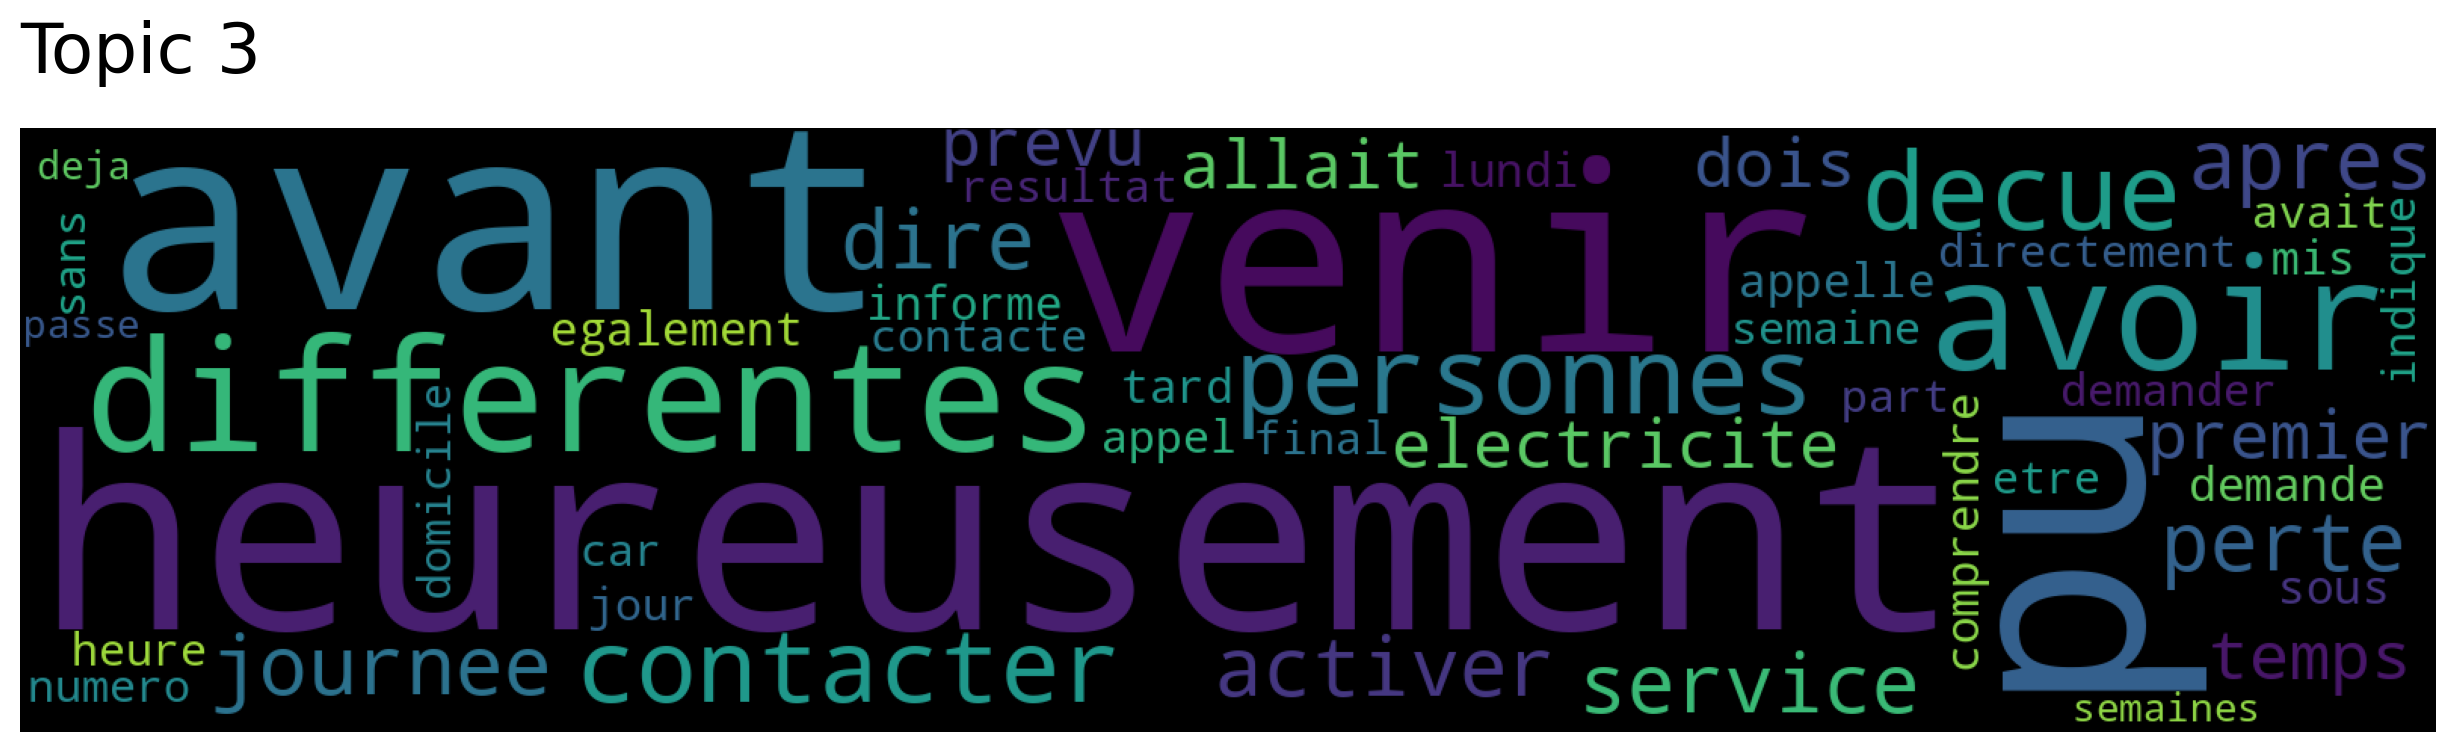

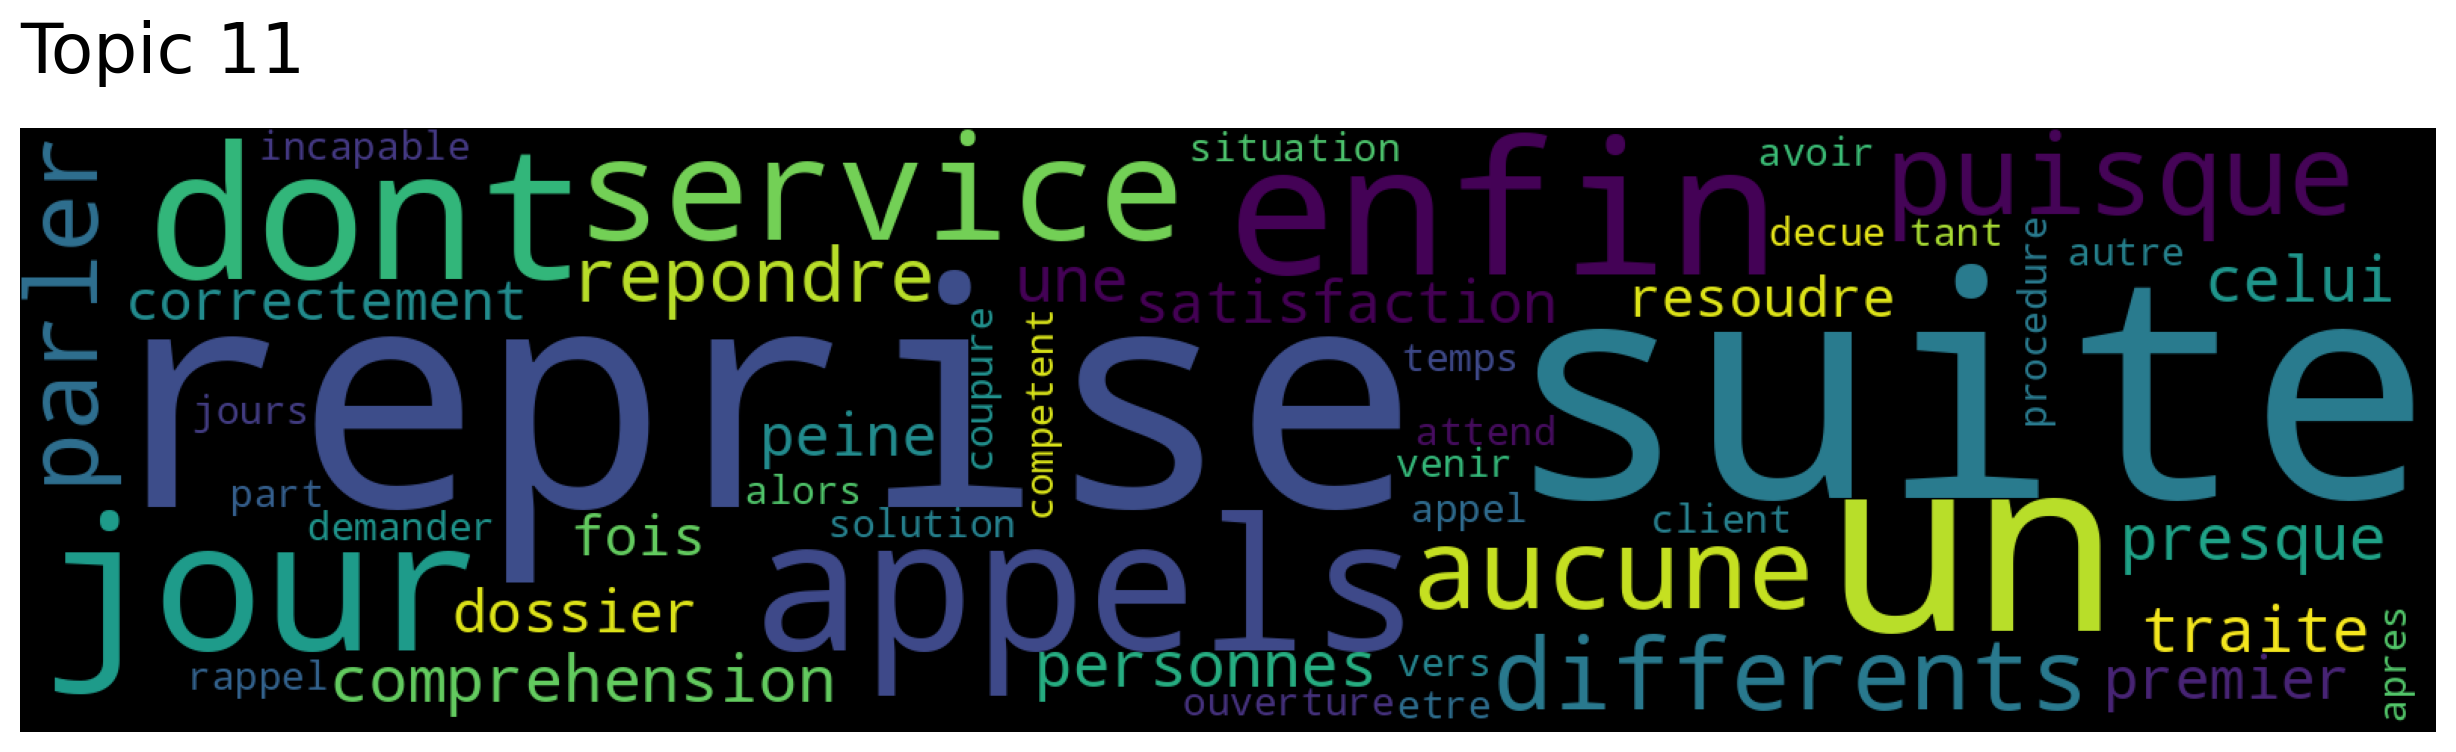

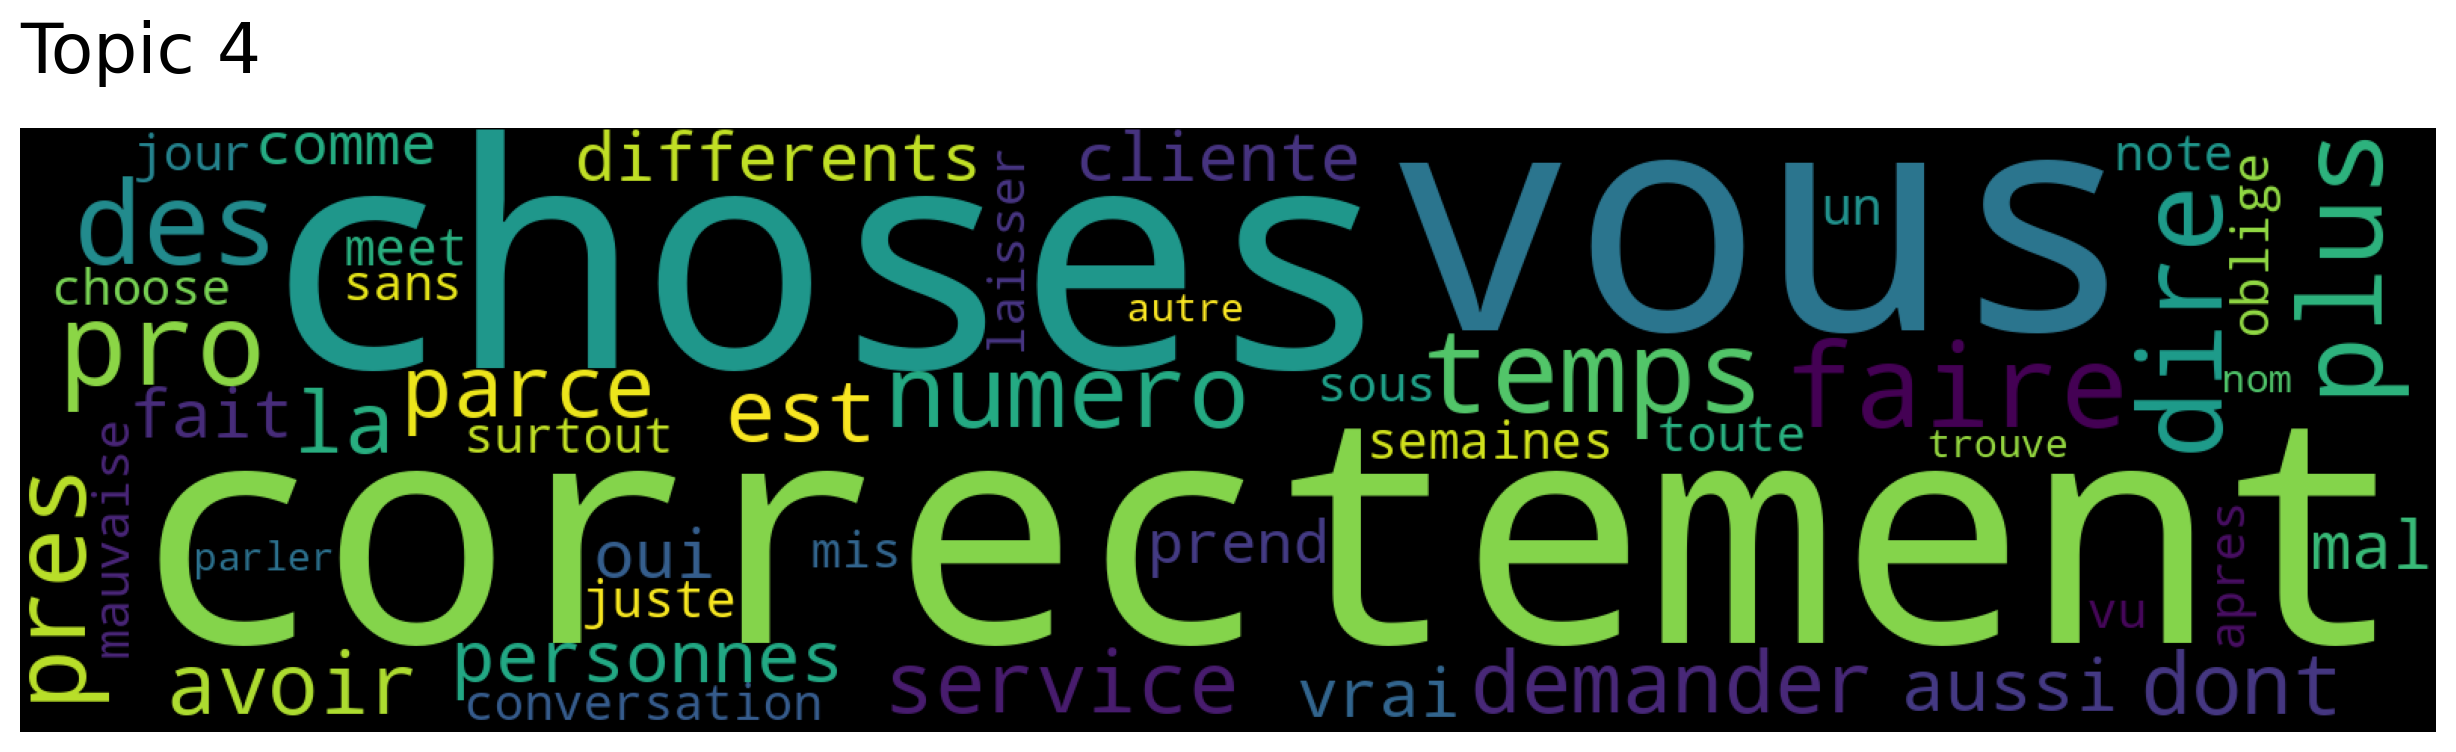

In [ ]:
# Converting the topics into a wordcloud
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["appel"], num_topics=num_topics_to_retrieve)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
# Getting documents(reviews) related to the keywords
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["tarif","prix"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1184, Score: 0.8596956729888916
-----------
client depuis septembr 2021. facil souscrir lign . tarif clair calqu tarif réglement plus l'option `` heur sup creus '' 2h 6h -50 % ht tarif heur plein réglement , valabl si utilis appareil énergivor nuit dispos d'appareil chauffag électr accumul . fait compt , si consomm moin 50 % 23 h 2h ( hc ) , 2h 6h ( hsc ) 6h 7h ( hc ) , gain dérisoir rapport tarif bas vu contraint . suiv conso clef wif branch linky vi l'appl total énerg tres bien fait ( calcul conso kw où € ) permet voir si chois tarif convient éventuel chang
-----------

Document: 1583, Score: 0.8516738414764404
-----------
tres bon accueil téléphon , l'oper a pris temp nécessair expliqu répons question . j'ai souscr l'offr classiqu électr trouv plus intéress . prix kwh léger dessous tarif réglement fournisseur histor . l'abon prix .
-----------

Document: 1819, Score: 0.8432385325431824
-----------
grand facil souscrir , tarif intéress , quitt ancien fournisseur a augment p

In [ ]:
# Getting words having the same semantic meaning as the keywords with the score
words, word_scores = model.similar_words(keywords=["appel","demand"], keywords_neg=[], num_words=20)
print("Words with similar semantic meaning as tarif and prix")
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

Words with similar semantic meaning as tarif and prix
rappel 0.8017115937174607
celui 0.7955569751825796
service 0.7946392327035636
correctement 0.7761698481725297
avez 0.763778672340724
temps 0.7610219547293722
commence 0.7587520751046269
puisque 0.7463071363784405
appels 0.7453875440889253
personnes 0.7451627351380641
heureusement 0.7431102643032834
vers 0.7376186867812864
un 0.7374443348681183
differentes 0.7361607499924623
numero 0.7349360647559561
avoir 0.7338036032232593
toujours 0.7300858179440143
hier 0.7282312148227275
choose 0.7260462713916256
dont 0.7237887016031028


Appending all the topics and making a single wordcloud out of them to ge thte most important representations(Doesnt work dont run)

In [ ]:
from top2vec import Top2Vec
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the top words for each topic and combine them into a single list
all_words = []
topics = model.get_topics()
for i in range(len(topics)):
    topic_words = topics[i][0:77]
    all_words.append(topic_words)
all_words
wordcloud_text = " ".join(all_words)



TypeError: ignored

Concentrating all the topics created by the the top2vec model to 3 topics 

In [ ]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=1)
model.topic_words_reduced

array([['redir', 'appreci', 'content', 'facil', 'interess', 'excellent',
        'prec', 'parfait', 'top', 'reactiv', 'bemol', 'satisfait',
        'clart', 'satisfais', 'satisf', 'compar', 'inst', 'parf',
        'competent', 'merc', 'rapid', 'attract', 'deroul', 'comprehens',
        'simpl', 'sympath', 'efficac', 'apprec', 'ensembl', 'bon',
        'assez', 'net', 'cordial', 'tres', 'competit', 'reactif', 'rav',
        'souhait', 'sup', 'particuli', 'ras', 'appli', 'disponibl',
        'clair', 'detail', 'courtois', 'proposit', 'accueil', 'su',
        'tre']], dtype='<U10')

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

topic_mapping = model.hierarchical_topic_reduction(num_topics=1)
topic_words = model.topic_words[0]
topic_words

array(['content', 'redir', 'appreci', 'excellent', 'parfait', 'reactiv',
       'interess', 'facil', 'prec', 'compar', 'ensembl', 'satisfais',
       'ras', 'simpl', 'top', 'comprehens', 'clart', 'competent', 'inst',
       'bemol', 'souhait', 'bon', 'satisfait', 'satisf', 'net', 'merc',
       'detail', 'tout', 'cordial', 'assez', 'rav', 'attract', 'deroul',
       'rapid', 'apprec', 'perm', 'sup', 'actuel', 'parf', 'sympath',
       'cepend', 'proposit', 'suivr', 'difficult', 'particuli',
       'competit', 'info', 'plutot', 'tres', 'demarchag'], dtype='<U13')